<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#load-catalogs" data-toc-modified-id="load-catalogs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>load catalogs</a></span></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2
%aimport
# %reload_ext autoreload

Modules to reload:
all-except-skipped

Modules to skip:



In [2]:
import sys 
import os 
from os.path import abspath
path = abspath('..')

if path not in sys.path: 
    sys.path.insert(0, path)

In [3]:
from src.utils import const
from src.frames import plots
from src.frames import catalogs
from src.frames.params import Param
from src import plot_funcs

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

# load catalogs 

In [7]:
cat_file = const.data_path.joinpath('bolshoi/hlist_1.00035.csv')

hcat1 = catalogs.HaloCatalog(cat_file, "Bolshoi", use_generator=False, verbose=True, subhalos=False, 
                             filters=None)

Ignoring dividing by zero and invalid errors that should be filtered out anyways.
0
10
20
30
40
50
60
70


In [17]:
np.log10(hcat1.particle_mass * 1e3)

11.130333768495007

(array([139323.,  82354.,  48645.,  28779.,  16789.,   9667.,   5548.,
          3054.,   1675.,    853.]),
 array([11.13065535, 11.3925789 , 11.65450245, 11.916426  , 12.17834955,
        12.4402731 , 12.70219664, 12.96412019, 13.22604374, 13.48796729,
        13.74989084]),
 <a list of 10 Patch objects>)

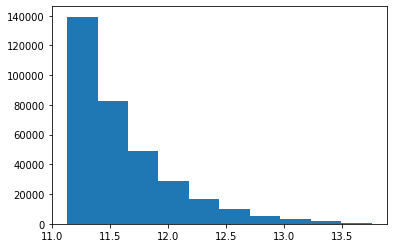

In [16]:
plt.hist(np.log10(hcat1.cat['mvir']))

In [13]:
print(sum(np.log10(hcat1.cat['mvir']) < 13.75))
print(len(hcat1.cat))

336687
336687


In [5]:

filters={
            'mvir': lambda self, cat: np.log10(self.get_values(cat, 'mvir')) > np.log10(self.particle_mass * 1e3),
            'upid': lambda self, cat: (self.get_values(cat, 'upid') == -1 if self.subhalos else
                                 self.get_values(cat, 'upid') >= 0)
        }

hcat2 = catalogs.HaloCatalog(cat_file, "Bolshoi", use_generator=False, verbose=True, subhalos=False, 
                             filters=filters)

#dummy test
filters={
            'mvir': lambda self, cat: np.log10(self.get_values(cat, 'mvir')) > np.log10(self.particle_mass * 1e3),
        }
hcat3 = catalogs.HaloCatalog(cat_file, "Bolshoi", use_generator=False, verbose=True, subhalos=False, filters=filters)


Ignoring dividing by zero and invalid errors that should be filtered out anyways.


/home/imendoza/alcca/nbody-relaxed/src/frames/catalogs.py:148: RuntimeWarning: divide by zero encountered in log10
  conds = conds & (np.log10(self.get_values(cat, 'mvir') < 13.75))


TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [16]:
print(len(hcat1.cat))
print(len(hcat2.cat))
print(len(hcat3.cat))


45039
45039
382477


In [18]:
np.array(hcat3.cat).nbytes / 1e6 

48.957056

In [33]:
hcat3.cat[hcat3.cat['Spin']<0.001]
#not equal to zero. 

mvir,rvir,rs,Xoff,Voff,vrms,Acc_Rate_1*Tdyn,Acc_Rate_Inst,T/|U|,Spin,scale_of_last_MM,cvir,q,phi_l,xoff,voff
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
409600000000.0,153.689,12.663,6.87127,3.32,130.51,18.14,31.0,0.5648,0.00099,0.1683,12.13685540551212,0.617005,2.046981662486881,0.04470892516705815,0.025438663703930733
301600000000.0,138.789,7.013,2.88312,5.92,124.89,3.737,-7.154,0.5594,0.00093,0.0963,19.79024668472836,0.64874,2.056753987356827,0.020773404232323888,0.04740171350788694
669800000000.0,181.067,14.121,2.8764,7.49,149.86,11.61,50.08,0.5422,0.00096,0.0963,12.822533814885631,0.66815,0.20439919450979044,0.01588583231621444,0.04997998131589483
168600000000.0,114.328,10.66,6.23681,6.12,128.05,-9.124,38.15,0.9998,0.00083,0.3243,10.724953095684803,0.83023,1.2617511952159426,0.05455190329578056,0.04779383053494728
3775000000000.0,322.223,30.325,7.75471,8.58,274.64,169.5,524.6,0.5938,0.00038,0.4083,10.62565539983512,0.56219,1.5344873660665745,0.02406628328828172,0.031240897174482963
475700000000.0,161.549,6.687,7.7699,11.57,199.6,-155.8,-496.0,0.9978,0.00096,0.3183,24.1586660684911,0.886405,0.9072893196112792,0.048096243245083534,0.057965931863727456
554700000000.0,170.043,21.04,11.0467,12.7,137.29,30.5,21.46,0.5866,0.00082,0.1923,8.08189163498099,0.80828,1.0306323980475125,0.06496415612521537,0.09250491659989803
2482000000000.0,280.188,22.408,5.90662,6.06,235.58,100.7,405.4,0.5552,0.00088,0.2463,12.50392716886826,0.71792,1.6712560882542098,0.02108091709851957,0.025723745649036418
2716000000000.0,288.756,22.133,8.58904,7.58,247.97,112.7,23.85,0.5618,0.00059,0.3123,13.046401301224416,0.667025,0.6692620258497947,0.02974497499619056,0.03056821389684236
